# One Layer LSTM

We will train the following number of cells for a One-Layer LSTM: 

In [1]:
import torch 
from torch import nn 
import numpy as np
import argparse
from Dataset import FairytalesDataset
from torch import nn, optim
from torch.utils.data import DataLoader
from train import save_checkpoint, load_checkpoint, train
from models import Lstm_model
from test import predict 
import time

In [2]:
DIR_PATH = "data/fairytales.txt"
START_TOKEN = "<s>"
END_TOKEN = "</s>"

parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=0)
parser.add_argument('--batch-size', type=int, default=256)
parser.add_argument('--sequence_length', type=int, default=7)
args, unknown = parser.parse_known_args()

dataset = FairytalesDataset(DIR_PATH, START_TOKEN, END_TOKEN, args)
print(dataset.__getitem__(3))
print('Vocab:', len(dataset.unique_words))

(tensor([ 53,   9,  73,   6,  19, 149,  40]), tensor([  9,  73,   6,  19, 149,  40,  93]))
Vocab: 3028


## 1. 128 cells

In [3]:
model = Lstm_model(dataset, lstm_size = 128, num_layers = 1)

In [4]:
start_time = time.time()

loss_hist = train(dataset, model, args, ckpt_filename='one_layer_lstm/128.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.03163933753967285


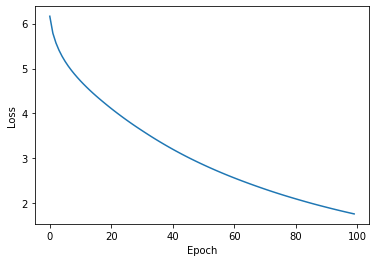

In [5]:
import matplotlib.pyplot as plt

exp = torch.load('one_layer_lstm/128.tar')
loss_history = exp["loss_history"]
plt.plot(range(len(loss_history)), loss_history) # trained for 60 epochs
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [6]:
text,sent_perplexity = predict(dataset, model, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about grows feast sign careful merchant even look for dead hair too hoped want who noticed inclined spoken eat against your visitor lose hunting paths and with their scabbard this was of people so poor that said you have to kill me what you i will marry him and everyone looked your being anxious so that you can reach you want </s> <s> angel replied he might be be my people </s> <s> and taking the hare sprang as he was very busy polishing in the white together </s> <s> the servant said lord never let fly and i also drink </s>
 
Number of sentences: 4
 
Perplexity per sentence: [2.701178631886715, 1.8231885735310922, 1.5428311683198905, 2.1821749757618987]
 
Average sentence perplexity: 2.062343337374899


## 2. 256 cells

In [7]:
model2 = Lstm_model(dataset, lstm_size = 256, num_layers = 1)

In [8]:
start_time = time.time()

loss_hist = train(dataset, model2, args, ckpt_filename='one_layer_lstm/256.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.05400419235229492


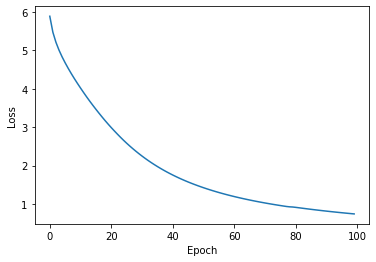

In [9]:
import matplotlib.pyplot as plt

exp2 = torch.load('one_layer_lstm/256.tar')
loss_history2 = exp2["loss_history"]
plt.plot(range(len(loss_history2)), loss_history2) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
text,sent_perplexity = predict(dataset, model2, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about in front without was a war against a week </s> <s> when he got back to the town a little while he was absent any little eaglets who ventured too near the ground would be sure to disappear down the monster throat </s> <s> their brothers who had been left behind as too young and weak to see the world knew nothing of all this but supposed their turn would soon come to see the world also </s> <s> and in a few days their eyes too opened and their wings flapped impatiently and they longed to fly away above </s>
 
Number of sentences: 4
 
Perplexity per sentence: [2.271318669634631, 0.5501557424646802, 0.004629362584845141, 0.0029110114441860927]
 
Average sentence perplexity: 0.7072536965320856


## 3. 512 cells 

In [3]:
model3 = Lstm_model(dataset, lstm_size = 512, num_layers = 1)

In [4]:
start_time = time.time()

train(dataset, model3, args, ckpt_filename='one_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.11610603332519531


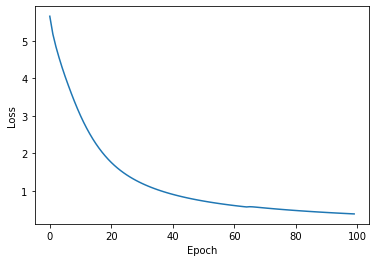

In [5]:
import matplotlib.pyplot as plt

exp3 = torch.load('one_layer_lstm/512.tar')
loss_history3 = exp3["loss_history"]
plt.plot(range(len(loss_history3)), loss_history3) 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
text,sent_perplexity = predict(dataset, model3, text='once upon a time', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> once upon a time high mouth the island was returned from the king who was getting tired of his lovely and he cut off a long curl and handed it to him </s> <s> the girl returned with him and managed to get a place as housemaid in the palace </s> <s> of course she was very busy all day long but whenever she had a little spare time she sat down to spin </s> <s> her distaff turned of itself and her spindle span by itself and the flax wound itself off and however much she might use there was always plenty left </s>
 
Number of sentences: 4
 
Perplexity per sentence: [1.8891170691995498, 0.15620754388183858, 0.000567015500979989, 0.0005226111318369946]
 
Average sentence perplexity: 0.5116035599285512
